In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the VGG model
vgg_model = VGG16(weights='imagenet')

# summarize the model
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

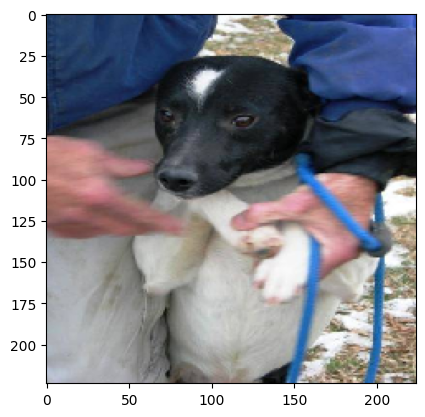

In [5]:
# load image
image = load_img("./../test_set/test_set/1.jpg", target_size=(224, 224))
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<built-in method min of numpy.ndarray object at 0x15e1f6790> <built-in method max of numpy.ndarray object at 0x15e1f6790>
<built-in method min of numpy.ndarray object at 0x15de32cd0> <built-in method max of numpy.ndarray object at 0x15de32cd0>
<built-in method min of numpy.ndarray object at 0x15e2612f0> <built-in method max of numpy.ndarray object at 0x15e2612f0>


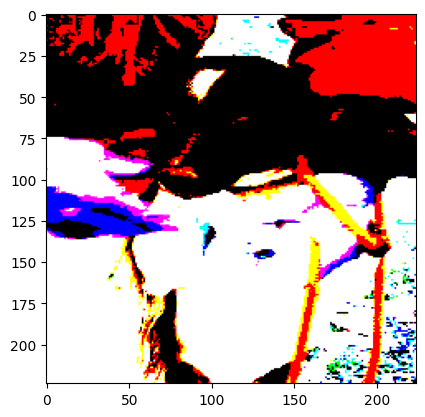

In [6]:
image = img_to_array(image)
print(image.min, image.max)

# reshape
image = np.expand_dims(image, axis=0)
print(image.min, image.max)

# scale for VGG
image = preprocess_input(image)
print(image.min, image.max)
plt.imshow(image[0])

In [8]:
# prediction
pred = vgg_model.predict(image)

pred_decode = decode_predictions(pred, top=3)[0]
print(pred_decode)

2023-10-26 07:19:16.820684: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


35363/35363 [==============================] - 0s 2us/step
[('n02091032', 'Italian_greyhound', 0.24660656), ('n02105412', 'kelpie', 0.15465614), ('n02087046', 'toy_terrier', 0.14137013)]


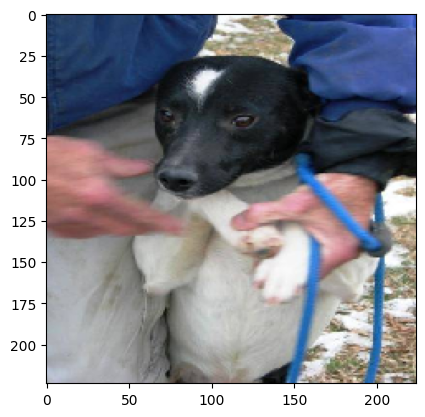

1/1 [==============================] - 0s 308ms/step
Italian_greyhound 24.660655856132507
Italian_greyhound 0.24660656
kelpie 0.15465614
toy_terrier 0.14137013


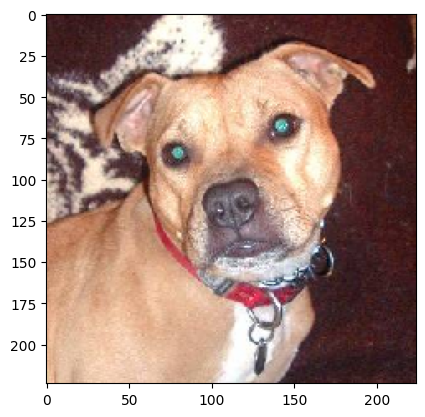

1/1 [==============================] - 0s 186ms/step
Staffordshire_bullterrier 47.40256369113922
Staffordshire_bullterrier 0.47402564
American_Staffordshire_terrier 0.38255322
Rhodesian_ridgeback 0.035150502


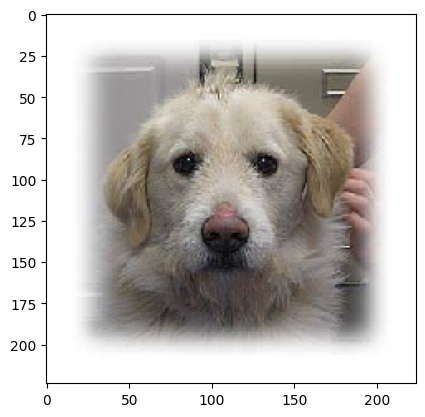

1/1 [==============================] - 0s 193ms/step
golden_retriever 53.78755331039429
golden_retriever 0.53787553
otterhound 0.21788208
clumber 0.07135659


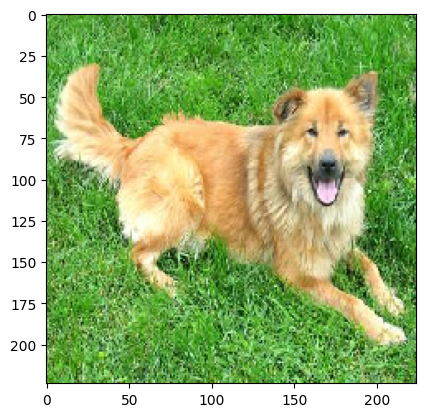

1/1 [==============================] - 0s 183ms/step
chow 64.59082961082458
chow 0.6459083
Tibetan_mastiff 0.059223477
German_shepherd 0.042173695


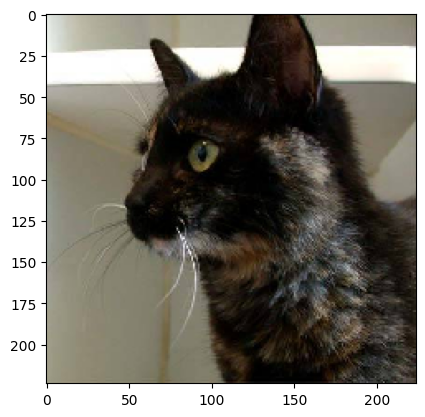

1/1 [==============================] - 0s 189ms/step
tabby 20.327863097190857
tabby 0.20327863
tub 0.19588885
washbasin 0.15743518


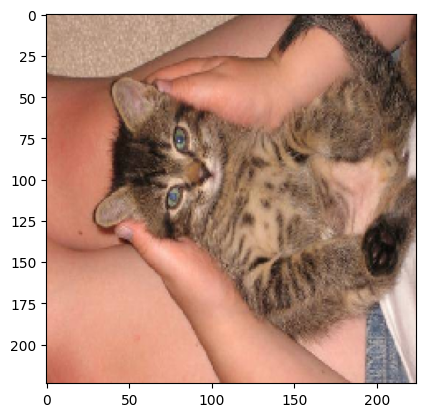

1/1 [==============================] - 0s 213ms/step
tabby 47.26351797580719
tabby 0.47263518
Egyptian_cat 0.14469554
tiger_cat 0.07858966


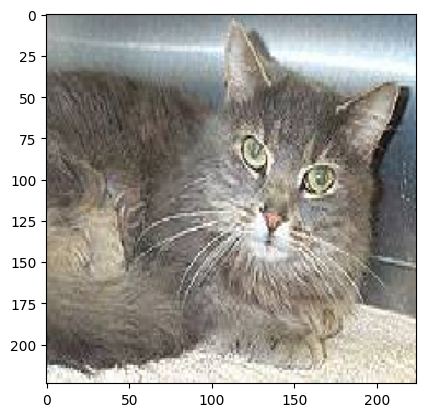

1/1 [==============================] - 0s 171ms/step
tabby 63.6319637298584
tabby 0.63631964
tiger_cat 0.1437477
Persian_cat 0.0745424


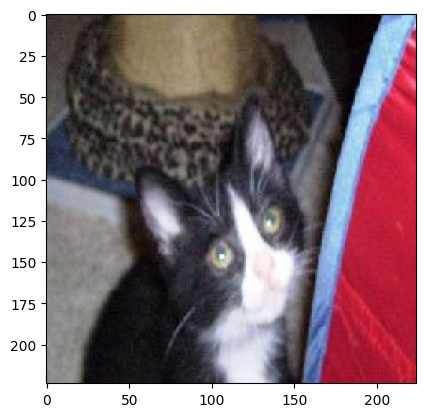

1/1 [==============================] - 0s 178ms/step
Egyptian_cat 15.177175402641296
Egyptian_cat 0.15177175
Angora 0.07908417
space_heater 0.067228496


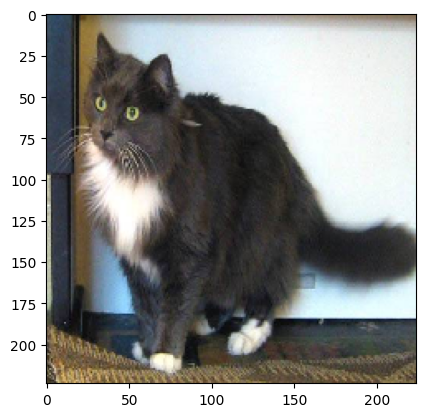

1/1 [==============================] - 0s 182ms/step
Persian_cat 19.121231138706207
Persian_cat 0.19121231
bookcase 0.05555592
monitor 0.05246172


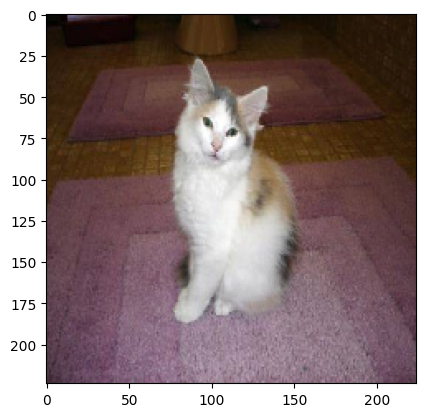

1/1 [==============================] - 0s 197ms/step
Egyptian_cat 19.52185332775116
Egyptian_cat 0.19521853
lynx 0.19232324
tabby 0.11115465


In [14]:
# function for predict
def predict(image_path):
    image = load_img(image_path, target_size=(224, 224))
    plt.imshow(image)
    plt.show()

    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)

    pred = vgg_model.predict(image)
    pred_decode = decode_predictions(pred, top=3)[0]
    print(pred_decode[0][1], pred_decode[0][2] * 100)
    for i in pred_decode:
        print(i[1], i[2])

# loop 10 images for predict
for i in range(10):
    predict(f"./../test_set/test_set/{i+1}.jpg")
    